<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# Importing the libraries


In [467]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [468]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [469]:
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

In [470]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [471]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [472]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [473]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [474]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [475]:
date_ = dataset['Date']

In [476]:
dataset = dataset.set_index('Date')

In [477]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

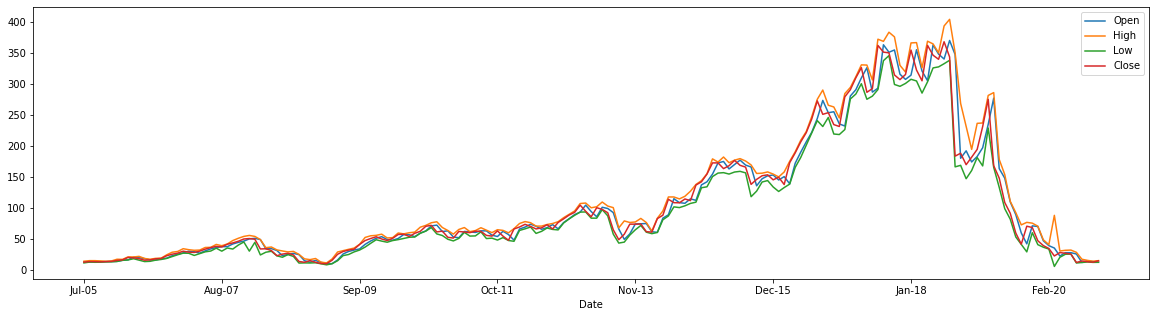

In [478]:
for col in dataset.columns[0:]:
    feature = dataset[col]
    feature.plot(figsize=(20, 5))
    plt.legend(dataset.columns)
plt.show()

In [479]:
# Create a variable to predict 'x' days out into future
future_months = 6

In [480]:
#@title This column will be the Target variable(Dependent variable) for predicting future close price. We are going to predict future close price of 6 months.

# Create a column 'Prediction' and shift 'x' days for future prediction
dataset['Prediction'] = dataset[['Close']].shift(-future_months)

In [481]:
dataset

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-05,13.00,14.00,11.25,12.46,15.33
Aug-05,12.58,14.88,12.55,13.42,16.12
Sep-05,13.48,14.87,12.27,13.30,20.08
Oct-05,13.20,14.47,12.40,12.99,19.49
Nov-05,13.35,13.88,12.88,13.41,18.03
...,...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95,NaN
Aug-20,12.00,17.16,11.85,14.37,NaN
Sep-20,14.30,15.34,12.75,13.15,NaN


In [482]:
# fill NAN values with 0 in 'Prediction' column
dataset['Prediction'] = dataset['Prediction'].fillna(0)

In [483]:
dataset.tail()

,Open,High,Low,Close,Prediction
Date,,,,,
Jul-20,25.60,28.30,11.10,11.95,0.0
Aug-20,12.00,17.16,11.85,14.37,0.0
Sep-20,14.30,15.34,12.75,13.15,0.0
Oct-20,13.30,14.01,12.11,12.42,0.0
Nov-20,12.41,14.90,12.21,14.67,0.0


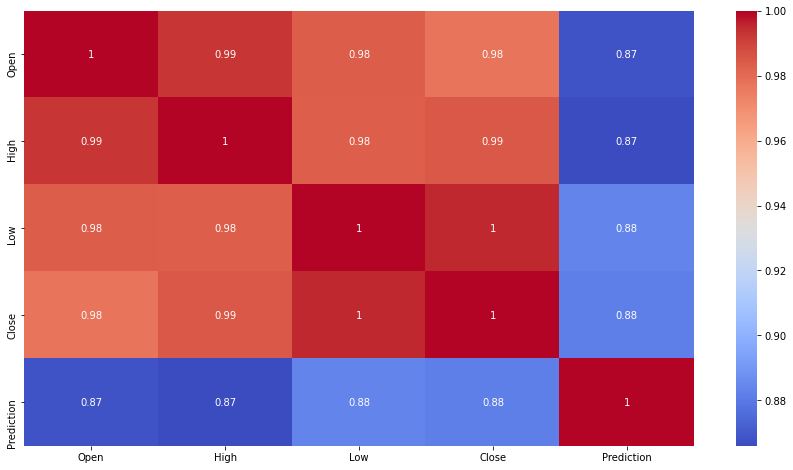

In [484]:
# Check Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [485]:
# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Function for returning a Dataset after checking VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [486]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Prediction']]])

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


In [487]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Prediction','Low','High']]])

,variables,VIF
0,Open,48.942848
1,Close,48.942848


In [488]:
calc_vif(dataset[[i for i in dataset.columns if i not in ['Open','Low','High']]])

,variables,VIF
0,Close,9.282698
1,Prediction,9.282698


In [489]:
# Creating Independent variable for train test split
X = dataset.iloc[:-future_months]['Close'].values

In [490]:
len(X)

179

In [491]:
X = X.reshape(X.shape[0],1)

In [492]:
X

array([[ 12.46],
       [ 13.42],
       [ 13.3 ],
       [ 12.99],
       [ 13.41],
       [ 13.71],
       [ 15.33],
       [ 16.12],
       [ 20.08],
       [ 19.49],
       [ 18.03],
       [ 15.62],
       [ 16.16],
       [ 17.84],
       [ 18.46],
       [ 22.78],
       [ 25.32],
       [ 26.97],
       [ 30.16],
       [ 28.63],
       [ 28.14],
       [ 30.31],
       [ 33.51],
       [ 35.98],
       [ 37.93],
       [ 36.99],
       [ 41.36],
       [ 43.48],
       [ 46.18],
       [ 49.81],
       [ 50.54],
       [ 49.42],
       [ 33.75],
       [ 34.06],
       [ 31.13],
       [ 22.85],
       [ 25.45],
       [ 26.83],
       [ 24.13],
       [ 13.58],
       [ 12.26],
       [ 15.03],
       [ 12.24],
       [ 10.26],
       [  9.98],
       [ 15.45],
       [ 25.12],
       [ 29.68],
       [ 31.93],
       [ 33.45],
       [ 40.99],
       [ 47.31],
       [ 50.57],
       [ 53.41],
       [ 49.84],
       [ 47.32],
       [ 50.97],
       [ 57.1 ],
       [ 57.57

In [493]:
y = dataset['Prediction'][:-future_months].values

In [494]:
y = y.reshape(y.shape[0],1)

In [495]:
y

array([[ 15.33],
       [ 16.12],
       [ 20.08],
       [ 19.49],
       [ 18.03],
       [ 15.62],
       [ 16.16],
       [ 17.84],
       [ 18.46],
       [ 22.78],
       [ 25.32],
       [ 26.97],
       [ 30.16],
       [ 28.63],
       [ 28.14],
       [ 30.31],
       [ 33.51],
       [ 35.98],
       [ 37.93],
       [ 36.99],
       [ 41.36],
       [ 43.48],
       [ 46.18],
       [ 49.81],
       [ 50.54],
       [ 49.42],
       [ 33.75],
       [ 34.06],
       [ 31.13],
       [ 22.85],
       [ 25.45],
       [ 26.83],
       [ 24.13],
       [ 13.58],
       [ 12.26],
       [ 15.03],
       [ 12.24],
       [ 10.26],
       [  9.98],
       [ 15.45],
       [ 25.12],
       [ 29.68],
       [ 31.93],
       [ 33.45],
       [ 40.99],
       [ 47.31],
       [ 50.57],
       [ 53.41],
       [ 49.84],
       [ 47.32],
       [ 50.97],
       [ 57.1 ],
       [ 57.57],
       [ 53.83],
       [ 58.99],
       [ 62.22],
       [ 70.3 ],
       [ 71.86],
       [ 61.21

In [496]:
len(y)

179

In [497]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Linear Regression model on the Training set

In [498]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [499]:
dataset.iloc[-future_months:]['Low'].values

array([25.55, 11.1 , 11.85, 12.75, 12.11, 12.21])

In [500]:
X_future = dataset.iloc[-future_months:]['Low'].values
X_future = X_future.reshape(X_future.shape[0],1)
X_future

array([[25.55],
       [11.1 ],
       [11.85],
       [12.75],
       [12.11],
       [12.21]])

In [501]:
# X_future = dataset.drop(['Prediction'],1).iloc[:, :-1]
# X_future = X_future.tail(future_months).values
# X_future

In [502]:
X_future.shape

(6, 1)

In [503]:
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[[34.67]
 [21.72]
 [22.39]
 [23.2 ]
 [22.62]
 [22.71]]


In [504]:
dataset[X.shape[0]:]

,Open,High,Low,Close,Prediction
Date,,,,,
Jun-20,27.75,31.95,25.55,25.60,0.0
Jul-20,25.60,28.30,11.10,11.95,0.0
Aug-20,12.00,17.16,11.85,14.37,0.0
Sep-20,14.30,15.34,12.75,13.15,0.0
Oct-20,13.30,14.01,12.11,12.42,0.0
Nov-20,12.41,14.90,12.21,14.67,0.0


<function matplotlib.pyplot.show>

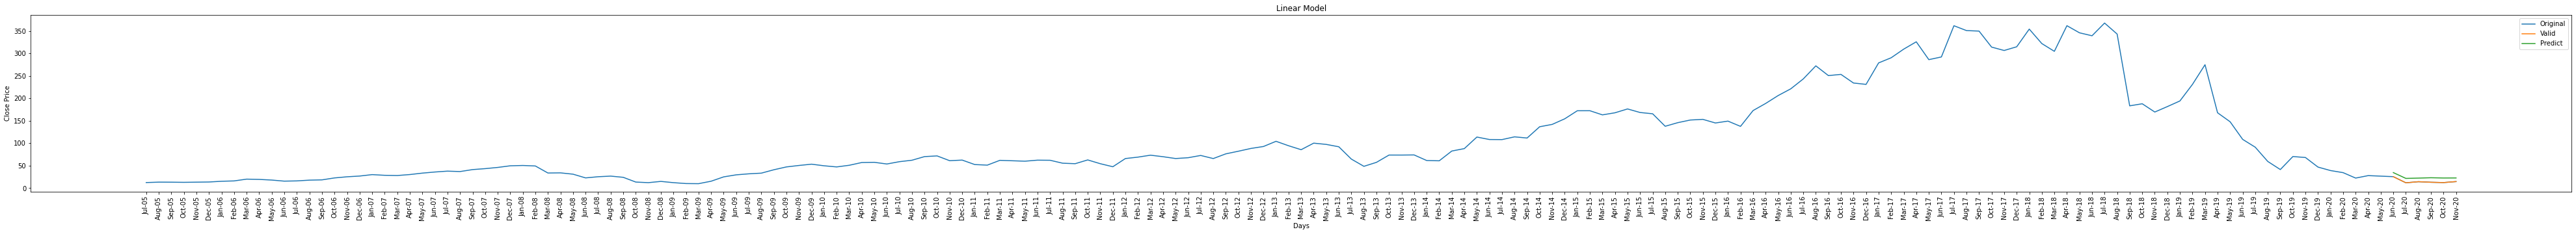

In [505]:
predictions = lr_prediction

valid = dataset[X.shape[0]:]
# valid = dataset[X.shape[0]-future_days:]
valid['Prediction'] = predictions
plt.figure(figsize=(70,5))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(dataset['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])
plt.xticks(rotation=90)
plt.show

In [506]:
lr.score(X_train, y_train)

0.7649965965871575

In [507]:
lr.coef_

array([[0.9]])

In [508]:
len(lr.coef_)

1

In [509]:
lr.intercept_

array([11.77])

In [560]:
from sklearn.tree import DecisionTreeRegressor
tree_prediction = DecisionTreeRegressor().fit(X_train, y_train)

In [561]:
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()

[12.24 40.99 31.93 19.49 31.93 31.93]



<function matplotlib.pyplot.show>

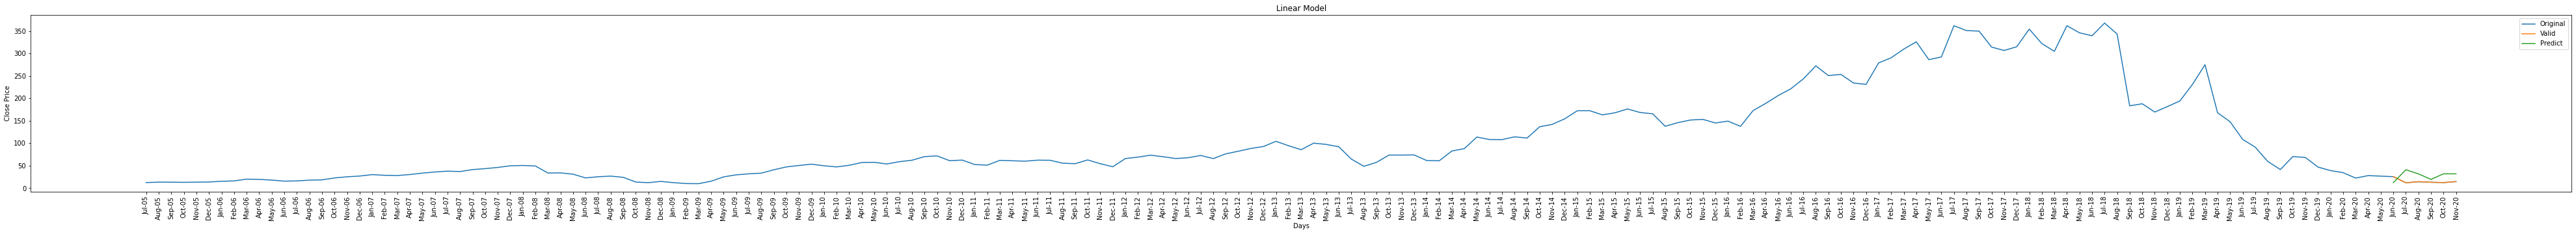

In [562]:
predictions = tree_prediction

valid = dataset[X.shape[0]:]
# valid = dataset[X.shape[0]-future_days:]
valid['Prediction'] = predictions
plt.figure(figsize=(70,5))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(dataset['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])
plt.xticks(rotation=90)
plt.show

In [510]:
y_pred = lr.predict(X_test)

In [511]:
y_pred

array([[ 23.94],
       [ 20.96],
       [ 44.02],
       [ 29.24],
       [185.95],
       [ 32.19],
       [ 67.54],
       [ 41.81],
       [221.79],
       [ 60.02],
       [ 29.77],
       [ 25.77],
       [286.8 ],
       [196.79],
       [219.08],
       [336.33],
       [316.2 ],
       [ 35.94],
       [ 63.31],
       [ 68.15],
       [ 56.07],
       [256.11],
       [ 74.58],
       [ 63.37],
       [ 41.75],
       [325.53],
       [ 77.87],
       [162.34],
       [ 45.77],
       [ 72.57],
       [ 38.37],
       [ 36.82],
       [236.64],
       [105.36],
       [ 27.93],
       [ 48.84]])

In [512]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2140.820532211447
RMSE : 46.269001850174455


In [513]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.7917911823097021
Adjusted R2 :  0.7856673935541052


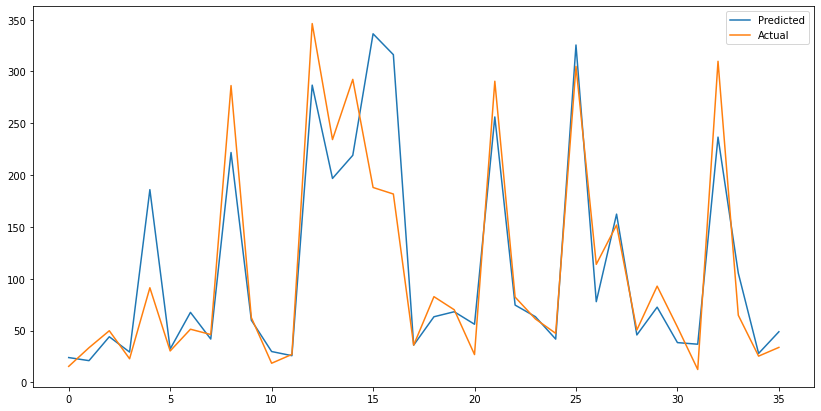

In [514]:
plt.figure(figsize=(14,7))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [515]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [516]:
lasso.score(X_train, y_train)

0.7649965965871574

In [517]:
lasso.coef_

array([0.9])

In [518]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [519]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 50}

Using  {'alpha': 50}  the negative mean squared error is:  -2460.0868433268693


In [520]:
y_pred_lasso = lasso_regressor.predict(X_test)

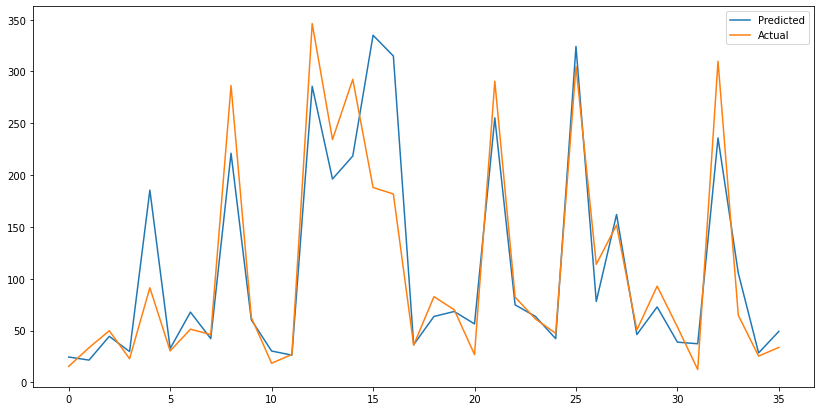

In [521]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [522]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2131.127711573931
RMSE : 46.164138804638505
R2 : 0.792733872598148
Adjusted R2 :  0.7866378100275053


# <b> Implementing Ridge Regression

In [523]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [524]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [525]:
ridge.score(X_train, y_train)

0.7649965965871529

In [526]:
y_pred_r = ridge.predict(X_test)

In [527]:
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2140.820406066942
RMSE : 46.26900048701011
R2 : 0.7917911945780814
Adjusted R2 :  0.7856674061833191


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [528]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [529]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -2383.6996706747814


In [530]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [531]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2140.694455216454
RMSE : 46.26763939533175
R2 : 0.7918034441231846
Adjusted R2 :  0.7856800160091606


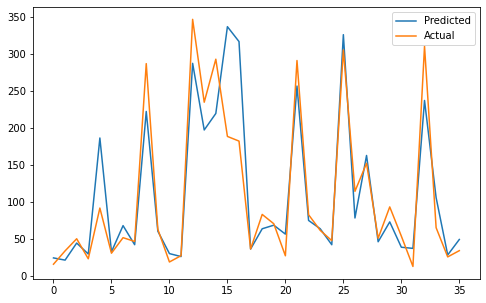

In [532]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [533]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [534]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -2383.6996706747814


In [535]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [536]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2140.694455216454
RMSE : 46.26763939533175
R2 : 0.7918034441231846
Adjusted R2 :  0.7856800160091606


In [537]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [538]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [539]:
elasticnet.score(X_train, y_train)

0.7649965964835823

In [540]:
y_pred_en = elasticnet.predict(X_test)

In [541]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2140.801453266038
RMSE : 46.26879567555263
R2 : 0.7917930378620974
Adjusted R2 :  0.785669303681571


In [542]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [543]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100, 'l1_ratio': 0.3}

Using  {'alpha': 100, 'l1_ratio': 0.3}  the negative mean squared error is:  -2459.099527133488


In [544]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [545]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2123.5472748482275
RMSE : 46.08196257591714
R2 : 0.7934711197164781
Adjusted R2 :  0.7873967408846099


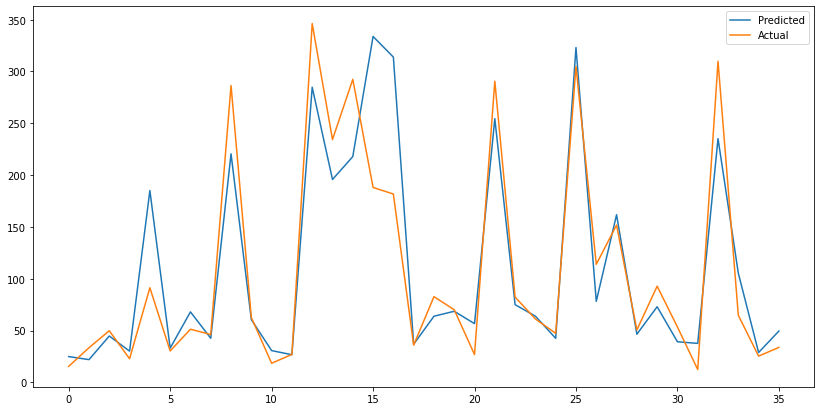

In [546]:
plt.figure(figsize=(14,7))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Polynomial Regression model on the Training set

In [547]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [548]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 25.16  15.45]
 [ 25.02  33.45]
 [ 33.37  49.81]
 [ 25.94  22.78]
 [182.18  91.3 ]
 [ 26.77  30.31]
 [ 61.84  51.29]
 [ 31.71  46.18]
 [209.53 286.38]
 [ 50.86  62.54]
 [ 26.07  18.46]
 [ 25.34  26.97]
 [306.95 346.2 ]
 [187.57 234.28]
 [206.4  292.37]
 [269.29 188.05]
 [306.48 181.75]
 [ 28.27  35.98]
 [ 55.49  82.7 ]
 [ 62.79  70.07]
 [ 45.71  26.83]
 [262.18 290.56]
 [ 73.18  82.29]
 [ 55.58  61.21]
 [ 31.67  47.32]
 [292.75 304.9 ]
 [ 78.71 113.89]
 [173.98 151.82]
 [ 34.82  50.54]
 [ 69.87  92.84]
 [ 29.53  53.41]
 [ 28.7   12.42]
 [229.86 309.82]
 [124.45  64.76]
 [ 25.67  25.32]
 [ 37.65  33.75]]


## Evaluating the Model Performance

In [549]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8264367457626837

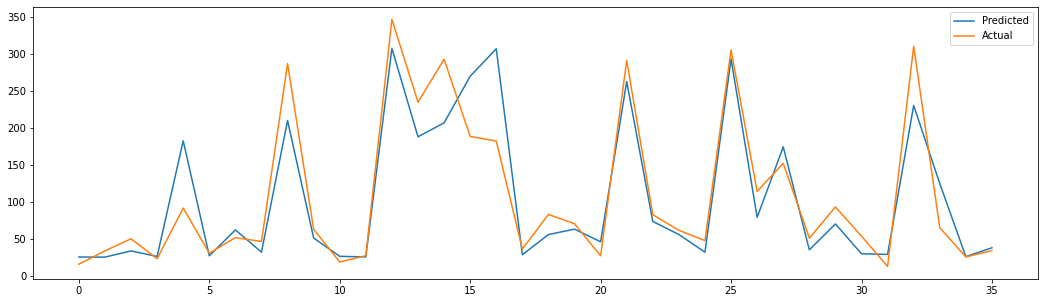

In [550]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Decision Tree Regression model on the Training set

In [551]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

## Predicting the Test set results

In [552]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 15.62  15.45]
 [ 40.99  33.45]
 [ 49.42  49.81]
 [ 28.14  22.78]
 [253.52  91.3 ]
 [ 15.03  30.31]
 [ 65.99  51.29]
 [ 24.13  46.18]
 [ 59.5  286.38]
 [ 53.83  62.54]
 [ 28.14  18.46]
 [ 47.31  26.97]
 [183.45 346.2 ]
 [231.26 234.28]
 [ 59.5  292.37]
 [354.45 188.05]
 [231.2  181.75]
 [ 14.67  35.98]
 [ 71.86  82.7 ]
 [ 62.38  70.07]
 [ 22.85  26.83]
 [ 41.45 290.56]
 [ 61.98  82.29]
 [ 71.86  61.21]
 [ 24.13  47.32]
 [322.25 304.9 ]
 [ 88.14 113.89]
 [ 70.45 151.82]
 [ 49.42  50.54]
 [ 26.85  92.84]
 [ 37.93  53.41]
 [ 41.36  12.42]
 [326.14 309.82]
 [172.5   64.76]
 [ 28.63  25.32]
 [ 22.45  33.75]]


## Evaluating the Model Performance

In [553]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2461231742893848

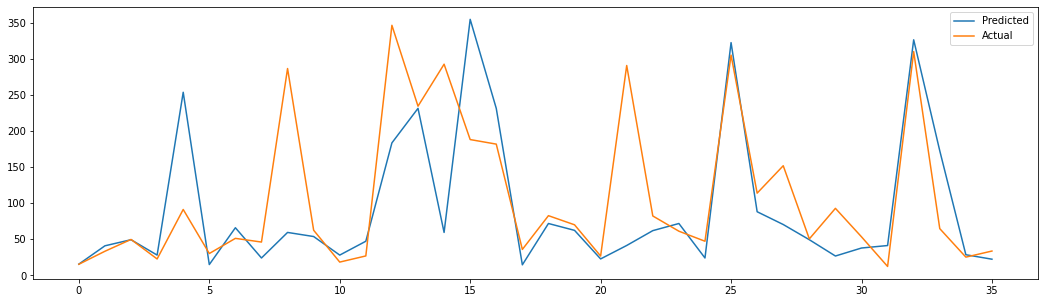

In [554]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

## Training the Random Forest Regression model on the whole dataset

In [555]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [556]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 15.91  15.45]
 [ 37.59  33.45]
 [ 35.4   49.81]
 [ 28.24  22.78]
 [244.97  91.3 ]
 [ 13.77  30.31]
 [ 58.68  51.29]
 [ 20.96  46.18]
 [152.04 286.38]
 [ 59.45  62.54]
 [ 28.24  18.46]
 [ 34.85  26.97]
 [250.07 346.2 ]
 [233.84 234.28]
 [152.04 292.37]
 [325.11 188.05]
 [234.72 181.75]
 [ 15.33  35.98]
 [ 64.28  82.7 ]
 [ 56.52  70.07]
 [ 41.31  26.83]
 [196.19 290.56]
 [ 51.77  82.29]
 [ 64.28  61.21]
 [ 20.96  47.32]
 [259.65 304.9 ]
 [ 88.75 113.89]
 [108.53 151.82]
 [ 38.33  50.54]
 [ 34.67  92.84]
 [ 36.47  53.41]
 [ 37.47  12.42]
 [285.36 309.82]
 [140.22  64.76]
 [ 28.53  25.32]
 [ 36.71  33.75]]


## Evaluating the Model Performance

In [557]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6742383224771737

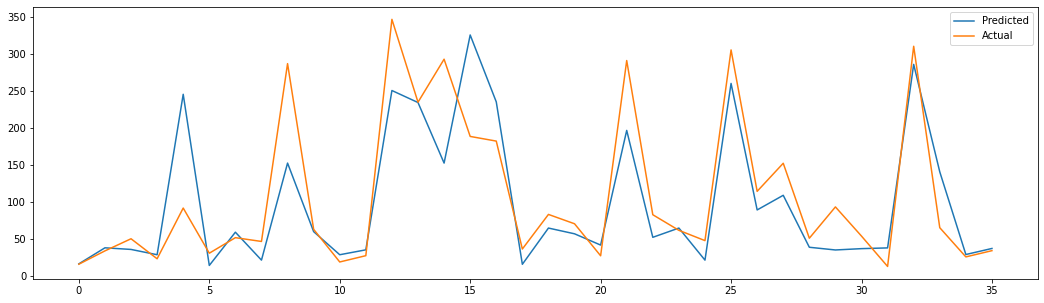

In [558]:
plt.figure(figsize=(18,5))
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()